In [142]:
# Importing necessary packages + initializing settings
import pandas as pd
import nltk
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from collections import Counter
from string import punctuation
# nltk.download(["stopwords","vader_lexicon"])
import matplotlib.pyplot as plt

pd.set_option("display.max_rows",5)

# Loading data
# training_data = pd.read_csv("./twitter_training.csv", index_col=0, names=["Index","Entity","Sentiment","Tweet"])
testing_data = pd.read_csv("./twitter_validation.csv", index_col=0, names=["Index","Entity","Sentiment","Tweet"])

# Outputting first 5 rows of training data
# training_data.head()
# Outputting first 5 rows of testing data
# testing_data.head()

    #removing_mentions = r'@[A-Za-z0-9_]+'
    #removing_links = r'httpss?://[^ ]+'
    #removing_links_mentions = r'|'.join((removing_mentions,removing_links))
    #removing_www = r'www.[^ ]+'

indices = testing_data.index.values.tolist()

In [143]:
'''
This function processes the tweet into a string array for NLP sentiment analysis.
'''

def clean_tweet(tweet):

    removing_mentions = r'@[A-Za-z0-9_]+'
    
    tweet = tweet.lower()

    tweet = re.sub(removing_mentions, '', tweet)

    tokens = tweet.split()
    table = str.maketrans(" "," ",punctuation)
    tokens = [w.translate(table) for w in tokens]
    token = [w for w in tokens if w.isalpha()]
    stop_words = stopwords.words("english")
    new_tweet = [w for w in token if w not in stop_words]

    return ' '.join(new_tweet)

In [183]:
'''
This function returns statistics on processed set of tweets.
Returns frequency data as well as sentiment analysis.
'''

def analyze_tweet(input_tweets):

    all_sentiment = []

    count = 0

    for idx in range(len(input_tweets)):   
        temp = sentiment_analyzer.polarity_scores(input_tweets[idx])
        all_sentiment.append(temp["compound"])

    
    freq_dist_tweet = nltk.FreqDist(input_tweets) 

    return all_sentiment, freq_dist_tweet

In [184]:
testing_data.Tweet

Index
3364    I mentioned on Facebook that I was struggling ...
352     BBC News - Amazon boss Jeff Bezos rejects clai...
                              ...                        
8069    Bought a fraction of Microsoft today. Small wins.
6960    Johnson & Johnson to stop selling talc baby po...
Name: Tweet, Length: 1000, dtype: object

In [185]:
# Testing tweet cleaner
idx = indices[233]

# Original input
testing_data.Tweet.loc[idx]

'AWESOME !!  BONECAKES...with strawberries and original maple syrup please !!!\r\n☠️☠️☠️ 😍 ☠️☠️☠️\r\n@BunnieKat1962 @OctoberBones @searcher9090 @Homenutt_1 @SkellyIce  @DeathsLastLaugh @CryptMidwest @RJCrowtherJr @1carolinagirl @Figster017 @lesliea10115 @Vampire4me @MadmMonstrosity'

In [186]:
# Clean output
clean_tweet(testing_data.Tweet.loc[idx])

'awesome bonecakeswith strawberries original maple syrup please'

In [187]:
token_tweets = []

for idx in testing_data.index.values.tolist():
    token_tweets.append(clean_tweet(testing_data.Tweet.loc[idx]))
    


In [188]:
freq_dist_tweet = nltk.FreqDist(token_tweets)
freq_dist_tweet.most_common(3)

[('wow', 3), ('check video leagueoflegends captured outplayed', 3), ('wtf', 2)]

In [189]:
test_conco = nltk.Text(token_tweets)
test_conco.concordance("check video leagueoflegends captured outplayed")

Displaying 3 of 3 matches:
e outrage anger check video leagueoflegends captured outplayed like almost tim
 apps disgusted check video leagueoflegends captured outplayed gotta buy xbox 
would boss move check video leagueoflegends captured outplayed man fifa game d


In [190]:
# Testing sentiment analyzer
idx = 6960
sentiment_analyzer = SentimentIntensityAnalyzer()
print(sentiment_analyzer.polarity_scores(clean_tweet(testing_data.Tweet.loc[idx])))
print(testing_data.Sentiment.loc[idx])


{'neg': 0.196, 'neu': 0.804, 'pos': 0.0, 'compound': -0.296}
Neutral


In [191]:

input_tweets = []

pos_count_true = 0
neg_count_true = 0
neu_count_true = 0


for idx in testing_data.index.values.tolist():
    input_tweets.append(clean_tweet(testing_data.Tweet.loc[idx]))

    if testing_data.Sentiment.loc[idx]=='Positive':
        pos_count_true+=1
    elif testing_data.Sentiment.loc[idx]=='Negative':
        neg_count_true+=1
    else:
        neu_count_true+=1

sentiment, freq = analyze_tweet(input_tweets)

Text(0.5, 1.0, 'Sentiment of tweets over time')

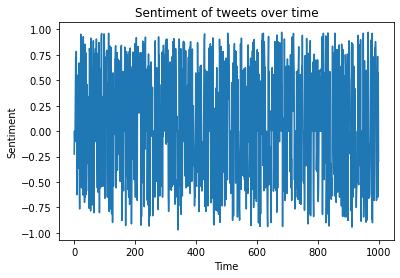

In [193]:
plt.figure
plt.plot(sentiment)
plt.show
plt.xlabel("Time")
plt.ylabel("Sentiment")
plt.title("Sentiment of tweets over time")